In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import clearml
from datetime import datetime

In [93]:
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=ESG2JYW25TMQ8SG3QUENQHQNL99XXG
%env CLEARML_API_SECRET_KEY=F1gti6U7SrNVrM-t8tptJIeLpSzmcSHdBbC_4LHKBSTa2Xmfig3gjt2MO_2D6P15UH8

env: CLEARML_WEB_HOST=https://app.clear.ml/
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=ESG2JYW25TMQ8SG3QUENQHQNL99XXG
env: CLEARML_API_SECRET_KEY=F1gti6U7SrNVrM-t8tptJIeLpSzmcSHdBbC_4LHKBSTa2Xmfig3gjt2MO_2D6P15UH8


# Версионирование сырых данных Clear ML


# Препроцесс и описательная статитстика

In [2]:

df_raw = pd.read_csv('../data/raw/all_posts_v1.csv')

In [95]:
from clearml import Task

# Инициализация задачи
task = Task.init(
    project_name="NLP Course Project",
    task_name="VK Posts EDA Analysis", 
    task_type=Task.TaskTypes.data_processing,
    reuse_last_task_id=False
)

# Логируем параметры
task.set_parameter("dataset_path", "../data/raw/all_posts_v1.csv")
task.set_parameter("target_group", "mosmetro")


ClearML Task: created new task id=8272bf4e0bb64944938893911c3f2de0
ClearML results page: https://app.clear.ml/projects/b93684681a0643b0b06120e4b9c7d805/experiments/8272bf4e0bb64944938893911c3f2de0/output/log
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


In [ ]:
# # Версионирование сырых данных в Clear ML
# from clearml import Dataset

# # Создаем датасет ClearML
# dataset = Dataset.create(
#     dataset_name="VK_Posts_Raw",
#     dataset_project="NLP Course Project"
# )

# # Добавляем файл с данными в датасет
# dataset.add_files('../data/raw/all_posts_v1.csv')

# # Загружаем метаданные о датасете
# dataset.set_metadata({
#     'description': 'Сырые данные постов VK для NLP проекта',
#     'source': 'VK API',
#     'total_rows': len(df_raw),
#     'columns': list(df_raw.columns),
#     'data_types': str(df_raw.dtypes.to_dict()),
#     'groups_count': df_raw['group_name'].nunique(),
#     'date_range': f"{df_raw['date'].min()} - {df_raw['date'].max()}"
# })

# # Финализируем версию датасета
# dataset.finalize(auto_upload=True)

# print("✅ Сырые данные заверсионированы в Clear ML")
# print(f"📊 ID датасета: {dataset.id}")

ClearML results page: https://app.clear.ml/projects/622af47656c34ad9b3d661810c7915f5/experiments/1652c1be3d084a919bb7c0f425a09d4b/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/622af47656c34ad9b3d661810c7915f5/experiments/1652c1be3d084a919bb7c0f425a09d4b
Displaying metadata in the UI is only supported for pandas Dataframes for now. Skipping!
Pending uploads, starting dataset upload to https://files.clear.ml
Uploading dataset changes (1 files compressed to 15.8 MiB) to https://files.clear.ml


████████████████████████████████ 100% | 15.80/15.8 MB [00:33<00:00,  2.14s/MB]: 


File compression and upload completed: total size 15.8 MiB, 1 chunk(s) stored (average size 15.8 MiB)
✅ Сырые данные заверсионированы в Clear ML
📊 ID датасета: 1652c1be3d084a919bb7c0f425a09d4b


In [96]:
print(f"📊 Размер датасета: {df_raw.shape[0]} строк, {df_raw.shape[1]} колонок")
print("\n📝 Типы данных:")
print(df_raw.dtypes)

📊 Размер датасета: 72152 строк, 11 колонок

📝 Типы данных:
post_id               object
group_name            object
group_display_name    object
text                  object
comments_count         int64
likes                  int64
reposts                int64
views                  int64
date                  object
url                   object
text_length            int64
dtype: object


In [97]:
df_raw['group_name']

0           mosmetro
1           mosmetro
2           mosmetro
3           mosmetro
4           mosmetro
            ...     
72147    gazetametro
72148    gazetametro
72149    gazetametro
72150    gazetametro
72151    gazetametro
Name: group_name, Length: 72152, dtype: object

In [98]:
print("📊 АНАЛИЗ ВСЕХ ГРУПП ИЗ ДАТАСЕТА:")
print("=" * 60)

# Анализируем каждую группу отдельно
group_analysis = df_raw.groupby('group_name').agg({
    'comments_count': ['count', 'sum', 'mean', 'std', 'min', 'max'],
    'likes': ['mean'],
    'views': ['mean'],
    'text_length': ['mean']
}).round(2)

# Переименовываем колонки для читаемости
group_analysis.columns = [
    'posts_count', 'comments_total', 'comments_mean', 'comments_std', 
    'comments_min', 'comments_max', 'likes_mean', 'views_mean', 'text_length_mean'
]

print("📈 СТАТИСТИКА ПО ГРУППАМ:")
print(group_analysis.sort_values('posts_count', ascending=False))

📊 АНАЛИЗ ВСЕХ ГРУПП ИЗ ДАТАСЕТА:
📈 СТАТИСТИКА ПО ГРУППАМ:
             posts_count  comments_total  comments_mean  comments_std  \
group_name                                                              
moscowmetro        40958          384319           9.38         15.01   
gazetametro        16026           34938           2.18         13.25   
mosmetro            7937          272011          34.27        141.28   
mirmetro            7231           59280           8.20         24.20   

             comments_min  comments_max  likes_mean  views_mean  \
group_name                                                        
moscowmetro             0          1477        9.13      267.83   
gazetametro             0           620       25.94     3059.32   
mosmetro                0         10749      182.99    12346.61   
mirmetro                0          1443      113.54     4355.73   

             text_length_mean  
group_name                     
moscowmetro            292.14  
gaze

берем mosmetro тк эта группа имеет наибольшее количество ненулевых постов

In [99]:
# Фильтруем данные по выбранной группе
df_moscowmetro = df_raw[df_raw['group_name'] == 'mosmetro'].copy()

print("📊 АНАЛИЗ ГРУППЫ MOSCOWMETRO:")
print("=" * 50)
print(f"📝 Всего постов: {len(df_moscowmetro)}")
print(f"💬 Всего комментариев: {df_moscowmetro['comments_count'].sum()}")
print(f"📅 Период данных: {df_moscowmetro['date'].min()} - {df_moscowmetro['date'].max()}")

📊 АНАЛИЗ ГРУППЫ MOSCOWMETRO:
📝 Всего постов: 7937
💬 Всего комментариев: 272011
📅 Период данных: 2014-04-20 13:04:22 - 2025-11-05 09:30:00


In [100]:
# Преобразуем дату и извлекаем компоненты времени
df_moscowmetro['date'] = pd.to_datetime(df_moscowmetro['date'])
df_moscowmetro['year'] = df_moscowmetro['date'].dt.year
df_moscowmetro['month'] = df_moscowmetro['date'].dt.month
df_moscowmetro['year_month'] = df_moscowmetro['date'].dt.to_period('M')

# Анализ по годам
print("\n📈 РАСПРЕДЕЛЕНИЕ ПО ГОДАМ:")
yearly_stats = df_moscowmetro.groupby('year').agg({
    'comments_count': ['count', 'sum', 'mean'],
    'likes': ['mean'],
    'views': ['mean']
}).round(2)

yearly_stats.columns = ['posts', 'comments_total', 'comments_mean', 'likes_mean', 'views_mean']
print(yearly_stats)


📈 РАСПРЕДЕЛЕНИЕ ПО ГОДАМ:
      posts  comments_total  comments_mean  likes_mean  views_mean
year                                                              
2014   1043            6533           6.26       20.27        0.00
2015    510            8542          16.75       56.27        0.00
2016    479           10754          22.45       98.18        0.00
2017    809           23677          29.27      141.54    11620.43
2018    367           14322          39.02      179.49    16483.36
2019    426           22032          51.72      255.74    20646.98
2020    468           26732          57.12      339.36    21658.15
2021    378           17048          45.10      303.79    15838.87
2022    686           30769          44.85      263.50    18194.02
2023    932           48133          51.64      293.00    20691.85
2024   1033           32393          31.36      195.20    12414.04
2025    806           31076          38.56      170.09    16174.22


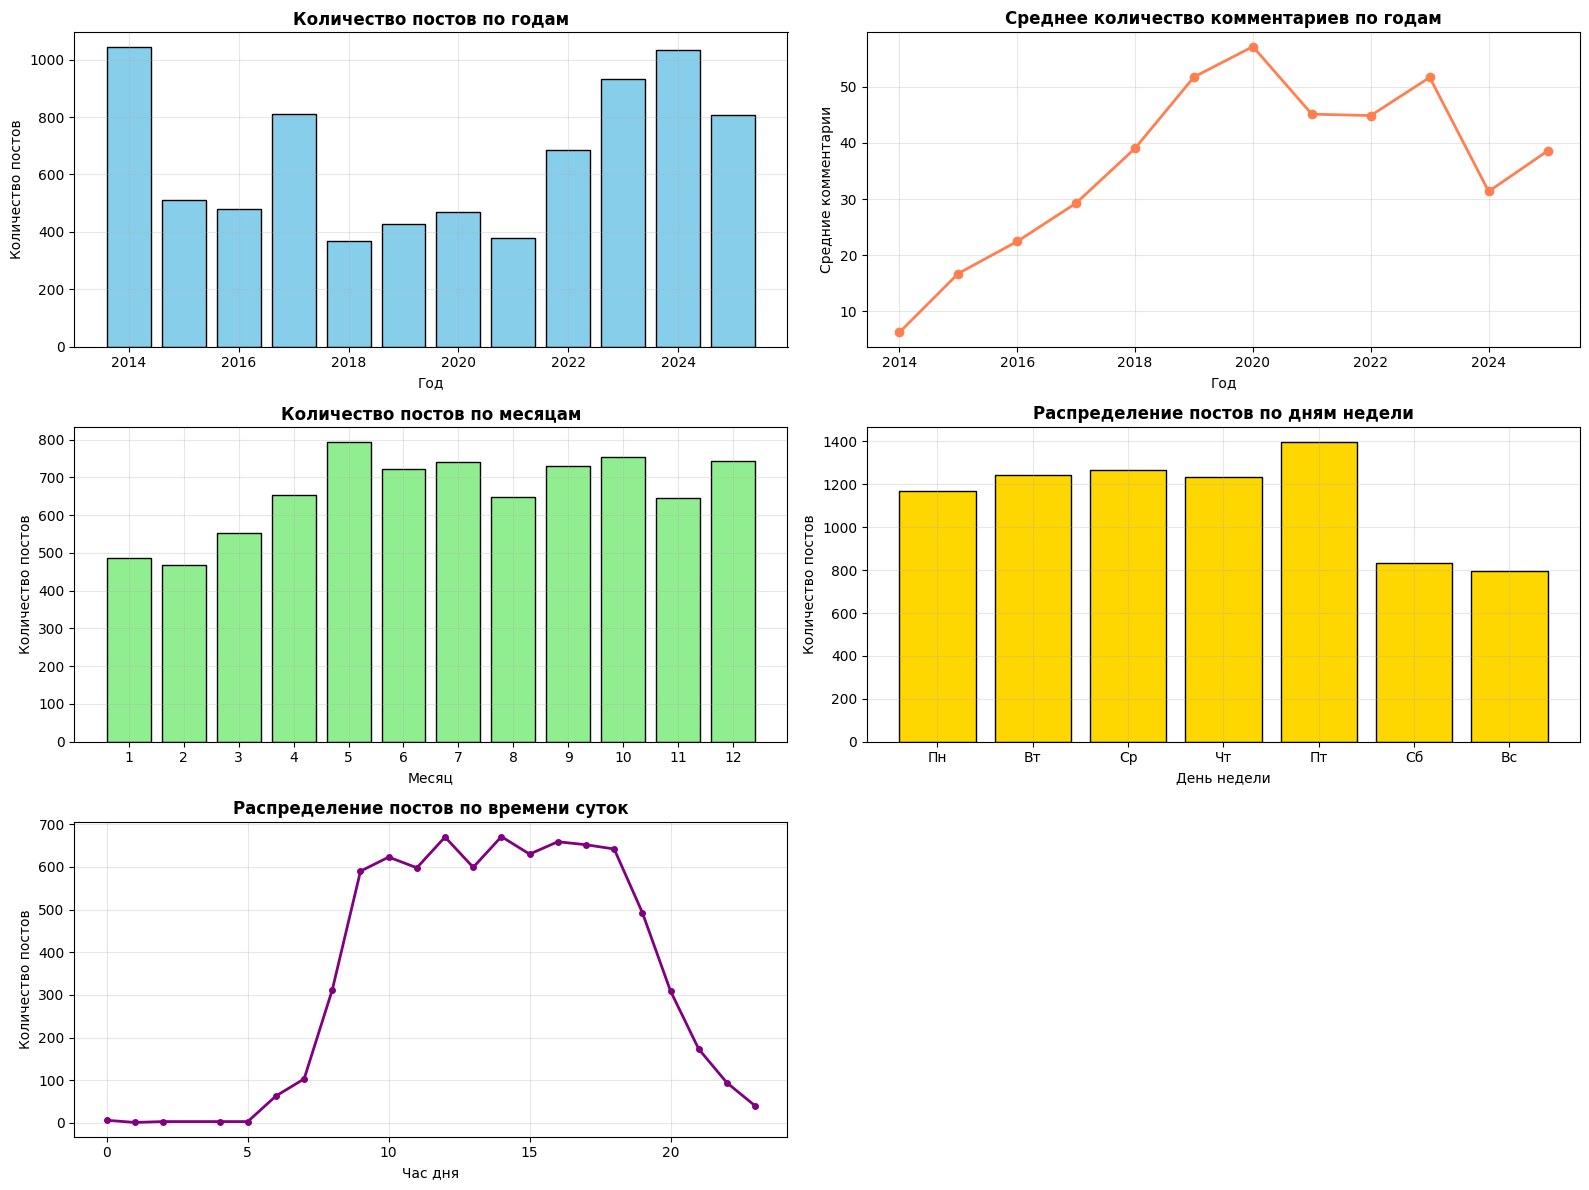

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))

# 1. Распределение постов по годам
plt.subplot(3, 2, 1)
posts_by_year = df_moscowmetro['year'].value_counts().sort_index()
plt.bar(posts_by_year.index, posts_by_year.values, color='skyblue', edgecolor='black')
plt.title('Количество постов по годам', fontweight='bold', fontsize=12)
plt.xlabel('Год')
plt.ylabel('Количество постов')
plt.grid(True, alpha=0.3)

# 2. Средние комментарии по годам
plt.subplot(3, 2, 2)
mean_comments_year = df_moscowmetro.groupby('year')['comments_count'].mean()
plt.plot(mean_comments_year.index, mean_comments_year.values, 'o-', linewidth=2, markersize=6, color='coral')
plt.title('Среднее количество комментариев по годам', fontweight='bold', fontsize=12)
plt.xlabel('Год')
plt.ylabel('Средние комментарии')
plt.grid(True, alpha=0.3)

# 3. Распределение по месяцам (все годы вместе)
plt.subplot(3, 2, 3)
posts_by_month = df_moscowmetro['month'].value_counts().sort_index()
plt.bar(posts_by_month.index, posts_by_month.values, color='lightgreen', edgecolor='black')
plt.title('Количество постов по месяцам', fontweight='bold', fontsize=12)
plt.xlabel('Месяц')
plt.ylabel('Количество постов')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# 4. Активность по дням недели
plt.subplot(3, 2, 4)
df_moscowmetro['day_of_week'] = df_moscowmetro['date'].dt.dayofweek
days_count = df_moscowmetro['day_of_week'].value_counts().sort_index()
day_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
plt.bar(day_names, days_count.values, color='gold', edgecolor='black')
plt.title('Распределение постов по дням недели', fontweight='bold', fontsize=12)
plt.xlabel('День недели')
plt.ylabel('Количество постов')
plt.grid(True, alpha=0.3)

# 5. Распределение по часам публикации
plt.subplot(3, 2, 5)
df_moscowmetro['hour'] = df_moscowmetro['date'].dt.hour
hourly_count = df_moscowmetro['hour'].value_counts().sort_index()
plt.plot(hourly_count.index, hourly_count.values, 'o-', linewidth=2, markersize=4, color='purple')
plt.title('Распределение постов по времени суток', fontweight='bold', fontsize=12)
plt.xlabel('Час дня')
plt.ylabel('Количество постов')
plt.grid(True, alpha=0.3)



plt.tight_layout()
plt.show()

In [102]:
# 2013-2019 - золотая середина
selected_years = [ 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_selected = df_moscowmetro[df_moscowmetro['year'].isin(selected_years)]

print("✅ ВАРИАНТ A: 2013-2019 (ПЕРИОД СТАБИЛЬНОЙ АКТИВНОСТИ)")
print(f"• Годы: {selected_years}")
print(f"• Постов: {len(df_selected)} ({len(df_selected)/len(df_moscowmetro)*100:.1f}% от всех данных)")
print(f"• Комментариев: {df_selected['comments_count'].sum()}")
print(f"• Средние комментарии: {df_selected['comments_count'].mean():.2f}")
print(f"• Охват: {len(selected_years)} лет стабильной активности")

✅ ВАРИАНТ A: 2013-2019 (ПЕРИОД СТАБИЛЬНОЙ АКТИВНОСТИ)
• Годы: [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
• Постов: 7131 (89.8% от всех данных)
• Комментариев: 240935
• Средние комментарии: 33.79
• Охват: 11 лет стабильной активности


In [103]:
# Анализ дубликатов
print("\n🔁 ДУБЛИКАТЫ:")
print(f"Полные дубликаты строк: {df_selected.duplicated().sum()}")
print(f"Дубликаты по тексту постов: {df_selected['text'].duplicated().sum()}")
print(f"Дубликаты по ID постов: {df_selected['post_id'].duplicated().sum()}")


🔁 ДУБЛИКАТЫ:
Полные дубликаты строк: 0
Дубликаты по тексту постов: 357
Дубликаты по ID постов: 0


In [104]:
original_size = len(df_selected)
df = df_selected.copy()

# Удаляем дубликаты по тексту (самые важные)
print("🗑️ Удаляем дубликаты текстов...")
df_clean = df.drop_duplicates(subset=['text'], keep='first')
duplicates_removed = original_size - len(df_clean)
print(f"   Удалено дубликатов текста: {duplicates_removed}")

🗑️ Удаляем дубликаты текстов...
   Удалено дубликатов текста: 357


In [105]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6774 entries, 806 to 7936
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   post_id             6774 non-null   object        
 1   group_name          6774 non-null   object        
 2   group_display_name  6774 non-null   object        
 3   text                6774 non-null   object        
 4   comments_count      6774 non-null   int64         
 5   likes               6774 non-null   int64         
 6   reposts             6774 non-null   int64         
 7   views               6774 non-null   int64         
 8   date                6774 non-null   datetime64[ns]
 9   url                 6774 non-null   object        
 10  text_length         6774 non-null   int64         
 11  year                6774 non-null   int32         
 12  month               6774 non-null   int32         
 13  year_month          6774 non-null   period[M]     


In [106]:
df_clean.describe()

,comments_count,likes,reposts,views,date,text_length,year,month,day_of_week,hour
count,6774.000000,6774.000000,6774.000000,6774.000000,6774,6774.000000,6774.000000,6774.000000,6774.000000,6774.000000
mean,34.357248,175.568792,20.201358,11702.237231,2019-09-25 18:23:52.917183232,453.217301,2019.191910,7.007529,2.700030,13.974756
min,0.000000,0.000000,0.000000,0.000000,2014-04-20 13:04:22,1.000000,2014.000000,1.000000,0.000000,0.000000
25%,7.000000,62.000000,3.000000,0.000000,2016-05-01 11:27:34,185.000000,2016.000000,4.000000,1.000000,11.000000
50%,18.000000,125.000000,8.000000,10936.500000,2019-08-30 05:42:18,382.000000,2019.000000,7.000000,3.000000,14.000000
75%,39.000000,226.000000,19.000000,16221.000000,2023-05-06 17:11:51.750000128,616.750000,2023.000000,10.000000,4.000000,17.000000
max,3231.000000,4057.000000,835.000000,259168.000000,2024-12-31 18:29:16,4469.000000,2024.000000,12.000000,6.000000,23.000000
std,77.332221,195.919324,46.133309,13479.357849,NaN,371.000640,3.627017,3.311404,1.857641,3.904755


In [107]:

# Сохраняем исходные данные перед фильтрацией

# Применяем фильтры
df_clean= df_clean[
    (df_clean['views'] > 1) &  # больше 1 просмотра
    (df_clean['text_length'] >=1)  # хотя бы 1 символ
]



In [108]:
df_clean.shape

(4789, 16)

In [109]:
keep_columns = [
    'text',           # 🎯 ЕДИНСТВЕННЫЙ признак для NLP
    'comments_count' # 🎯 Целевая переменная
]

df_clean= df_clean[keep_columns].copy()
df_clean.head()

,text,comments_count
806,А какой поезд выбрали бы вы?,65
807,🎁 Приходите за новогодним настроением и получи...,3
808,Встречайте самые современные способы оплаты пр...,2
809,🚄 В новогоднюю ночь продлили движение поездов ...,1
810,В метро открылись две новые подземные пересадк...,12


In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4789 entries, 806 to 5904
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            4789 non-null   object
 1   comments_count  4789 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.2+ KB


In [111]:
print("🎯 ФИНАЛЬНЫЙ ДАТАСЕТ MOSMETRO:")
print("=" * 40)
print(f"📝 Постов: {len(df_clean)}")
print(f"💬 Комментариев всего: {df_clean['comments_count'].sum()}")
print(f"📈 Средние комментарии: {df_clean['comments_count'].mean():.2f}")

# Анализ распределения комментариев
print(f"\n📊 РАСПРЕДЕЛЕНИЕ КОММЕНТАРИЕВ:")
print(df_clean['comments_count'].describe())

# Проверяем диапазон комментариев
print(f"\n🔍 ДИАПАЗОН КОММЕНТАРИЕВ:")
print(f"• Мин: {df_clean['comments_count'].min()}")
print(f"• Макс: {df_clean['comments_count'].max()}")
print(f"• Медиана: {df_clean['comments_count'].median()}")

🎯 ФИНАЛЬНЫЙ ДАТАСЕТ MOSMETRO:
📝 Постов: 4789
💬 Комментариев всего: 207619
📈 Средние комментарии: 43.35

📊 РАСПРЕДЕЛЕНИЕ КОММЕНТАРИЕВ:
count    4789.000000
mean       43.353310
std        89.733191
min         0.000000
25%        11.000000
50%        24.000000
75%        48.000000
max      3231.000000
Name: comments_count, dtype: float64

🔍 ДИАПАЗОН КОММЕНТАРИЕВ:
• Мин: 0
• Макс: 3231
• Медиана: 24.0


In [112]:
print("🚨 ВЫЯВЛЕНЫ АНОМАЛИИ В ДАННЫХ:")
print("=" * 50)

# Анализ аномалий
print(f"• Среднее: 43.35 комментариев на пост - СЛИШКОМ ВЫСОКОЕ")
print(f"• Медиана: 24 комментария - ВСЕ ЕЩЕ ОЧЕНЬ ВЫСОКОЕ") 
print(f"• Максимум: 3231 комментария - НЕРЕАЛЬНО МНОГО")
print(f"• 25% перцентиль: 11 комментариев - ОЧЕНЬ ВЫСОКАЯ БАЗОВАЯ АКТИВНОСТЬ")

# Проверяем распределение более детально
print(f"\n📊 ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ:")
print(f"• Постов с 0 комментариев: {len(df_clean[df_clean['comments_count'] == 0])}")
print(f"• Постов с 1-5 комментариев: {len(df_clean[(df_clean['comments_count'] >= 1) & (df_clean['comments_count'] <= 5)])}")
print(f"• Постов с 6-20 комментариев: {len(df_clean[(df_clean['comments_count'] >= 6) & (df_clean['comments_count'] <= 20)])}")
print(f"• Постов с 21+ комментариев: {len(df_clean[df_clean['comments_count'] >= 21])}")

# Проверяем выбросы
Q1 = df_clean['comments_count'].quantile(0.25)
Q3 = df_clean['comments_count'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[df_clean['comments_count'] > upper_bound]
print(f"• Выбросов (по IQR): {len(outliers)} постов")
print(f"• Верхняя граница выбросов: {upper_bound:.1f} комментариев")

🚨 ВЫЯВЛЕНЫ АНОМАЛИИ В ДАННЫХ:
• Среднее: 43.35 комментариев на пост - СЛИШКОМ ВЫСОКОЕ
• Медиана: 24 комментария - ВСЕ ЕЩЕ ОЧЕНЬ ВЫСОКОЕ
• Максимум: 3231 комментария - НЕРЕАЛЬНО МНОГО
• 25% перцентиль: 11 комментариев - ОЧЕНЬ ВЫСОКАЯ БАЗОВАЯ АКТИВНОСТЬ

📊 ДЕТАЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЯ:
• Постов с 0 комментариев: 129
• Постов с 1-5 комментариев: 485
• Постов с 6-20 комментариев: 1486
• Постов с 21+ комментариев: 2689
• Выбросов (по IQR): 366 постов
• Верхняя граница выбросов: 103.5 комментариев


In [142]:
# 1. Фильтруем выбросы
print("🔧 ИСПРАВЛЯЕМ ДАННЫЕ...")

# Вариант A: Удаляем extreme выбросы (например, > 500 комментариев)
df_fixed = df_clean[df_clean['comments_count'] <= 500].copy()

# Вариант B: Или используем более строгий подход - 95% перцентиль
percentile_95 = df_clean['comments_count'].quantile(0.95)
df_fixed_percentile = df_clean[df_clean['comments_count'] <= percentile_95].copy()

print(f"✅ После удаления выбросов (>500): {len(df_fixed)} постов")
print(f"✅ После удаления 95% перцентиля: {len(df_fixed_percentile)} постов")

# 2. Проверяем новое распределение
print(f"\n📊 НОВОЕ РАСПРЕДЕЛЕНИЕ (без выбросов >500):")
print(f"• Постов: {len(df_fixed)}")
print(f"• Среднее: {df_fixed['comments_count'].mean():.2f}")
print(f"• Медиана: {df_fixed['comments_count'].median()}")
print(f"• Максимум: {df_fixed['comments_count'].max()}")

print(f"\n📊 НОВОЕ РАСПРЕДЕЛЕНИЕ (95% перцентиль):")
print(f"• Постов: {len(df_fixed_percentile)}")
print(f"• Среднее: {df_fixed_percentile['comments_count'].mean():.2f}")
print(f"• Медиана: {df_fixed_percentile['comments_count'].median()}")
print(f"• Максимум: {df_fixed_percentile['comments_count'].max()}")

🔧 ИСПРАВЛЯЕМ ДАННЫЕ...
✅ После удаления выбросов (>500): 4771 постов
✅ После удаления 95% перцентиля: 4552 постов

📊 НОВОЕ РАСПРЕДЕЛЕНИЕ (без выбросов >500):
• Постов: 4771
• Среднее: 39.49
• Медиана: 24.0
• Максимум: 496

📊 НОВОЕ РАСПРЕДЕЛЕНИЕ (95% перцентиль):
• Постов: 4552
• Среднее: 30.98
• Медиана: 23.0
• Максимум: 130



📈 СОЗДАЕМ ВИЗУАЛИЗАЦИИ ДЛЯ ОЧИЩЕННЫХ ДАННЫХ...


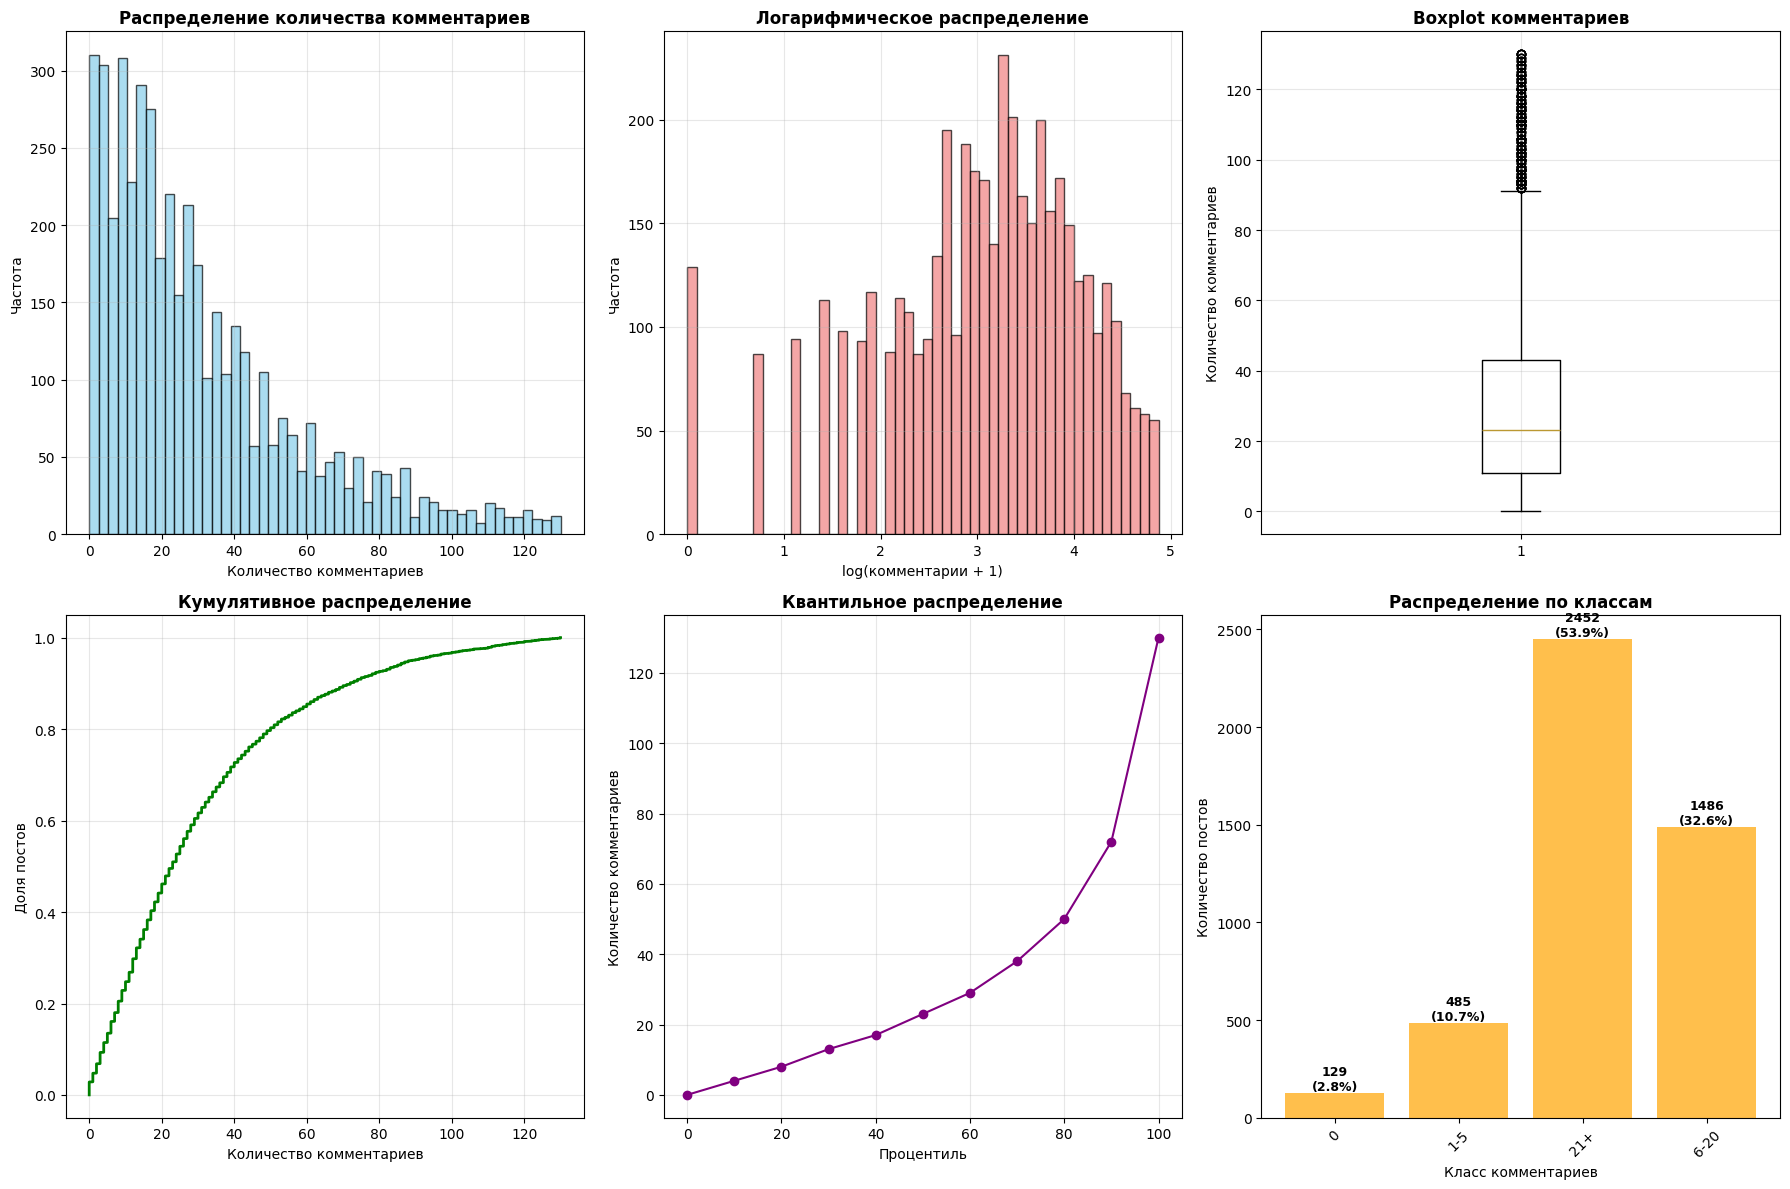

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка стиля
plt.style.use('default')
sns.set_palette("husl")

print("\n📈 СОЗДАЕМ ВИЗУАЛИЗАЦИИ ДЛЯ ОЧИЩЕННЫХ ДАННЫХ...")

# 1. Основные распределения
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1.1 Распределение комментариев
axes[0,0].hist(df_fixed_percentile['comments_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Распределение количества комментариев', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('Количество комментариев')
axes[0,0].set_ylabel('Частота')
axes[0,0].grid(True, alpha=0.3)

# 1.2 Распределение комментариев (логарифмическое)
axes[0,1].hist(np.log1p(df_fixed_percentile['comments_count']), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Логарифмическое распределение', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('log(комментарии + 1)')
axes[0,1].set_ylabel('Частота')
axes[0,1].grid(True, alpha=0.3)

# 1.3 Boxplot комментариев
axes[0,2].boxplot(df_fixed_percentile['comments_count'])
axes[0,2].set_title('Boxplot комментариев', fontweight='bold', fontsize=12)
axes[0,2].set_ylabel('Количество комментариев')
axes[0,2].grid(True, alpha=0.3)

# 1.4 Кумулятивное распределение
sorted_comments = np.sort(df_fixed_percentile['comments_count'])
y = np.arange(1, len(sorted_comments) + 1) / len(sorted_comments)
axes[1,0].plot(sorted_comments, y, linewidth=2, color='green')
axes[1,0].set_title('Кумулятивное распределение', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('Количество комментариев')
axes[1,0].set_ylabel('Доля постов')
axes[1,0].grid(True, alpha=0.3)

# 1.5 Квантильное распределение
quantiles = np.percentile(df_fixed_percentile['comments_count'], range(0, 101, 10))
axes[1,1].plot(range(0, 101, 10), quantiles, 'o-', color='purple')
axes[1,1].set_title('Квантильное распределение', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('Процентиль')
axes[1,1].set_ylabel('Количество комментариев')
axes[1,1].grid(True, alpha=0.3)

# 1.6 Распределение по классам для экспериментов
def create_classes(comments_count):
    if comments_count == 0:
        return '0'
    elif 1 <= comments_count <= 5:
        return '1-5'
    elif 6 <= comments_count <= 20:
        return '6-20'
    else:
        return '21+'

temp_classes = df_fixed_percentile['comments_count'].apply(create_classes)
class_dist = temp_classes.value_counts().sort_index()
bars = axes[1,2].bar(class_dist.index, class_dist.values, color='orange', alpha=0.7)
axes[1,2].set_title('Распределение по классам', fontweight='bold', fontsize=12)
axes[1,2].set_xlabel('Класс комментариев')
axes[1,2].set_ylabel('Количество постов')
axes[1,2].tick_params(axis='x', rotation=45)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    percent = (height / len(df_fixed_percentile)) * 100
    axes[1,2].text(bar.get_x() + bar.get_width()/2., height,
                  f'{int(height)}\n({percent:.1f}%)', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

In [116]:
task.close()
print("✅ Задача EDA завершена")

✅ Задача EDA завершена


In [144]:
df_fixed_percentile#версия2(ток комент и таргет без предобработки)

,text,comments_count
806,А какой поезд выбрали бы вы?,65
807,🎁 Приходите за новогодним настроением и получи...,3
808,Встречайте самые современные способы оплаты пр...,2
809,🚄 В новогоднюю ночь продлили движение поездов ...,1
810,В метро открылись две новые подземные пересадк...,12
...,...,...
5900,С Новым годом!\n \n/Скульптура «Пионерки с гло...,1
5901,Площадки проведения фестиваля «Путешествие в Р...,4
5902,График работы Новогоднего поезда #мосметро 1 и...,5
5903,"С Новым годом, друзья! :)\n\n/Скульптура «Птич...",12


In [ ]:
# # Получаем базовую версию
# base = Dataset.get(
#     dataset_name="VK_Posts_Raw",
#     dataset_project="NLP Course Project"
# )

# print(f"📁 Базовая версия: {base.id}")

# # Создаем новую версию с ТЕМ ЖЕ ИМЕНЕМ  
# updated = Dataset.create(
#     dataset_name="VK_Posts_Raw",   
#     dataset_project="NLP Course Project",
#     parent_datasets=[base.id]   
# )

# print(f"🔄 Создана новая версия: {updated.id}")

# # Сохраняем df_fixed_percentile
# temp_fixed_path = '../data/processed/mosmetro_fixed_percentile_v2.csv'
# df_fixed_percentile.to_csv(temp_fixed_path, index=False)

# # Добавляем файлы в новую версию
# updated.add_files(temp_fixed_path)

# # Устанавливаем метаданные для новой версии
# updated.set_metadata({
#     'description': 'Данные mosmetro с фиксированными выбросами комментариев - только текст и комментарии',
#     'version': '2.0',
#     'parent_dataset_id': base.id,
#     'total_posts': len(df_fixed_percentile),
#     'columns_remaining': list(df_fixed_percentile.columns),
#     'processing_changes': [
#         'outlier_removal_95th_percentile',
#         'column_selection_text_and_comments_only'
#     ],
#     'removed_outliers': len(df_moscowmetro) - len(df_fixed_percentile),
#     'removed_percentage': f"{(len(df_moscowmetro) - len(df_fixed_percentile)) / len(df_moscowmetro) * 100:.2f}%"
# })

# # Добавляем теги для версии
# updated.add_tags(['v2.0', 'outlier_fixed', 'text_only', 'cleaned'])

# # Финализируем
# updated.finalize(auto_upload=True)

# print("✅ Новая версия датасета создана!")
# print(f"📊 Цепочка версий: {base.id} -> {updated.id}")

📁 Базовая версия: 1652c1be3d084a919bb7c0f425a09d4b
ClearML results page: https://app.clear.ml/projects/622af47656c34ad9b3d661810c7915f5/experiments/8c67364cd2fc4259a1ab00775bea584c/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/622af47656c34ad9b3d661810c7915f5/experiments/8c67364cd2fc4259a1ab00775bea584c
🔄 Создана новая версия: 8c67364cd2fc4259a1ab00775bea584c
Displaying metadata in the UI is only supported for pandas Dataframes for now. Skipping!
Pending uploads, starting dataset upload to https://files.clear.ml
Uploading dataset changes (1 files compressed to 939.46 KiB) to https://files.clear.ml
File compression and upload completed: total size 939.46 KiB, 1 chunk(s) stored (average size 939.46 KiB)
✅ Новая версия датасета создана!
📊 Цепочка версий: 1652c1be3d084a919bb7c0f425a09d4b -> 8c67364cd2fc4259a1ab00775bea584c


In [92]:

df_path = '../data/raw/df_mosmetro_sample.csv'
df_fixed_percentile.to_csv(df_path, index=False, encoding='utf-8')
print(f"💾 Сохранено: {df_fixed_percentile}")

💾 Сохранено:                                                    text  comments_count
806                        А какой поезд выбрали бы вы?              65
807   🎁 Приходите за новогодним настроением и получи...               3
808   Встречайте самые современные способы оплаты пр...               2
809   🚄 В новогоднюю ночь продлили движение поездов ...               1
810   В метро открылись две новые подземные пересадк...              12
...                                                 ...             ...
5900  С Новым годом!\n \n/Скульптура «Пионерки с гло...               1
5901  Площадки проведения фестиваля «Путешествие в Р...               4
5902  График работы Новогоднего поезда #мосметро 1 и...               5
5903  С Новым годом, друзья! :)\n\n/Скульптура «Птич...              12
5904  10 тематических поездов вышли в 2016 году на л...               6

[4552 rows x 2 columns]


## Создаем версии данных для экспериментов:

## 1. Эксперимент 1: Регрессия (чистый текст)

## Предобработка текста для NLP

In [ ]:
df_exp1 = df_fixed_percentile[['text', 'comments_count']].copy()

*   Приведение к нижнему регистру: Преобразуйте все слова в нижний регистр.
*   Удаление знаков пунктуации и специальных символов.
*   Удаление стоп-слов: Используйте список стоп-слов для русского языка для удаления часто встречающихся, но не несущих важную информацию для анализа слов.
*   Лемматизация: приведите слова к нормальной форме

In [66]:
import pymorphy3
import re 
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import nltk
nltk.download('stopwords')
morph = pymorphy3.MorphAnalyzer()
def preprocess_text(text):
    """
    Предобработка текста: приведение к нижнему регистру, удаление пунктуации,
    стоп-слов и лемматизация
    """
    # Проверка на пустой текст
    if not isinstance(text, str) or not text.strip():
        return ""
    
    # Приведение к нижнему регистру
    text = text.lower().strip()
    
    # Удаление знаков пунктуации и специальных символов
    text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)
    text = re.sub(r'[^а-яё\s]', ' ', text)  # оставляем только русские буквы и пробелы
    text = re.sub(r'\s+', ' ', text).strip()  # удаляем лишние пробелы
    
    # Токенизация
    tokens = word_tokenize(text, language='russian')
    
    # Удаление стоп-слов и лемматизация
    stop_words = set(stopwords.words('russian'))
    lemmas = []
    
    for token in tokens:
        if token not in stop_words and len(token) > 2:  # игнорируем короткие слова
            parsed = morph.parse(token)[0]
            lemma = parsed.normal_form
            lemmas.append(lemma)
    
    return " ".join(lemmas)

print("\nНачало предобработки текста...")
# Применение предобработки к столбцу с текстом. Используем tqdm для отслеживания прогресса.
if 'text' in df_exp1.columns:
    tqdm.pandas()
    df_exp1['processed_text'] = df_exp1['text'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df_exp1.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Начало предобработки текста...


100%|██████████| 4552/4552 [00:28<00:00, 157.52it/s]

Предобработка текста завершена.


,text,comments_count,processed_text
806,А какой поезд выбрали бы вы?,65,поезд выбрать
807,🎁 Приходите за новогодним настроением и получи...,3,приходить новогодний настроение получить детск...
808,Встречайте самые современные способы оплаты пр...,2,встречать самый современный способ оплата прое...
809,🚄 В новогоднюю ночь продлили движение поездов ...,1,новогодний ночь продлить движение поезд мцд ка...
810,В метро открылись две новые подземные пересадк...,12,метро открыться два новый подземный пересадка ...


In [90]:
df_exp1 = df_exp1[['processed_text','comments_count']] 

exp1_path = '../data/processed/experiments/exp1_regres.csv'
df_exp1.to_csv(exp1_path, index=False, encoding='utf-8')
print(f"💾 Сохранено: {exp1_path}")

💾 Сохранено: ../data/processed/experiments/exp1_regres.csv


## 2. Эксперимент 2: Классификация (чистый текст)


In [76]:
def create_balanced_classes(comments_count):
    """Создает 4 сбалансированных класса на основе квантилей"""
    if comments_count <= 10:
        return '0-10'
    elif 11 <= comments_count <= 24:
        return '11-24'
    elif 25 <= comments_count <= 48: 
        return '25-40'
    else:
        return '40+'

# Применяем балансировку
df_exp2 = df_fixed_percentile[['text', 'comments_count']].copy()
df_exp2['target_class'] = df_exp2['comments_count'].apply(create_balanced_classes)

In [77]:
df_exp2['target_class'].value_counts()

target_class
11-24    1271
25-40    1195
0-10     1127
40+       959
Name: count, dtype: int64

In [79]:
print("\nНачало предобработки текста...")
# Применение предобработки к столбцу с текстом. Используем tqdm для отслеживания прогресса.
if 'text' in df_exp2.columns:
    tqdm.pandas()
    df_exp2['processed_text'] = df_exp2['text'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df_exp2.head())


Начало предобработки текста...


100%|██████████| 4552/4552 [00:27<00:00, 165.75it/s]

Предобработка текста завершена.


,text,comments_count,target_class,processed_text
806,А какой поезд выбрали бы вы?,65,40+,поезд выбрать
807,🎁 Приходите за новогодним настроением и получи...,3,0-10,приходить новогодний настроение получить детск...
808,Встречайте самые современные способы оплаты пр...,2,0-10,встречать самый современный способ оплата прое...
809,🚄 В новогоднюю ночь продлили движение поездов ...,1,0-10,новогодний ночь продлить движение поезд мцд ка...
810,В метро открылись две новые подземные пересадк...,12,11-24,метро открыться два новый подземный пересадка ...


In [ ]:

df_exp2 = df_exp2[['processed_text','target_class',]] 
exp2_path = '../data/processed/experiments/exp2_classification.csv'
df_exp2.to_csv(exp2_path, index=False, encoding='utf-8')
print(f"💾 Сохранено: {exp2_path}")

💾 Сохранено: ../data/processed/experiments/exp2_classification.csv


## Извлечение смайлов и хэштегов:

In [146]:
import re
import pandas as pd
from collections import Counter

# Функции для извлечения смайлов и хэштегов
def extract_emojis(text):
    """Извлечение смайлов из текста"""
    if pd.isna(text):
        return []
    # Регулярное выражение для поиска смайлов (эмодзи)
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # эмоции
        "\U0001F300-\U0001F5FF"  # символы & пиктограммы
        "\U0001F680-\U0001F6FF"  # транспорт & карты
        "\U0001F1E0-\U0001F1FF"  # флаги
        "\U00002702-\U000027B0"  # дополнительные символы
        "\U000024C2-\U0001F251"  # enclosed characters
        "]+", 
        flags=re.UNICODE
    )
    return emoji_pattern.findall(str(text))

def extract_hashtags(text):
    """Извлечение хэштегов из текста"""
    if pd.isna(text):
        return []
    # Ищем слова начинающиеся с #
    hashtag_pattern = re.compile(r'#\w+')
    return hashtag_pattern.findall(str(text))

def extract_mentions(text):
    """Извлечение упоминаний (@) из текста"""
    if pd.isna(text):
        return []
    mention_pattern = re.compile(r'@\w+')
    return mention_pattern.findall(str(text))

# Применяем функции ко всему датасету
print("🔍 Извлекаем смайлы, хэштеги и упоминания из текста...")

df_fixed_percentile['emojis'] = df_fixed_percentile['text'].apply(extract_emojis)
df_fixed_percentile['hashtags'] = df_fixed_percentile['text'].apply(extract_hashtags)
df_fixed_percentile['mentions'] = df_fixed_percentile['text'].apply(extract_mentions)

# Статистика по извлеченным данным
print("📊 СТАТИСТИКА ИЗВЛЕЧЕНИЯ:")
print(f"• Всего постов: {len(df_fixed_percentile)}")
print(f"• Постов со смайлами: {df_fixed_percentile['emojis'].apply(len).gt(0).sum()}")
print(f"• Постов с хэштегами: {df_fixed_percentile['hashtags'].apply(len).gt(0).sum()}")
print(f"• Постов с упоминаниями: {df_fixed_percentile['mentions'].apply(len).gt(0).sum()}")

🔍 Извлекаем смайлы, хэштеги и упоминания из текста...
📊 СТАТИСТИКА ИЗВЛЕЧЕНИЯ:
• Всего постов: 4552
• Постов со смайлами: 3024
• Постов с хэштегами: 1431
• Постов с упоминаниями: 255


In [147]:
# Получаем ВСЕ смайлы из колонки 'emojis'
all_emojis_list = []

# Проходим по всем строкам и собираем смайлы
for emoji_list in df_fixed_percentile['emojis']:
    all_emojis_list.extend(emoji_list)

# Считаем частоту каждого смайла
emoji_counts = Counter(all_emojis_list)
# Выводим все смайлы по порядку
 

all_unique_emojis = " ".join(emoji_counts.keys())

In [148]:
# Установите библиотеку если нет: pip install emoji
import emoji

def get_emoji_meaning(emoji_char):
    """Получить описание смайла"""
    try:
        # Пробуем получить описание через библиотеку emoji
        return emoji.demojize(emoji_char)
    except:
        return "Неизвестный смайл"

# Создаем словарь интерпретаций для всех найденных смайлов
emoji_meanings = {}
for emoji_char in emoji_counts.keys():
    meaning = get_emoji_meaning(emoji_char)
    emoji_meanings[emoji_char] = meaning

# Выводим смайлы с их значениями
print("🎯 СМАЙЛЫ С ИНТЕРПРЕТАЦИЯМИ:")
print("=" * 70)

for i, (emoji_char, count) in enumerate(emoji_counts.most_common(50), 1):
    meaning = emoji_meanings.get(emoji_char, "Неизвестный смайл")
    print(f"{i:2d}. {emoji_char} - {count:4d} раз - {meaning}")

🎯 СМАЙЛЫ С ИНТЕРПРЕТАЦИЯМИ:
 1. 🔹 - 5080 раз - :small_blue_diamond:
 2. 👇 -  310 раз - :backhand_index_pointing_down:
 3. 🚇 -  309 раз - :metro:
 4. 😉 -  295 раз - :winking_face:
 5. ❗ -  160 раз - :red_exclamation_mark:
 6. ❗️ -  160 раз - :red_exclamation_mark:
 7. ❤ -  155 раз - :red_heart:
 8. 😍 -  111 раз - :smiling_face_with_heart-eyes:
 9. 🚉 -   87 раз - :station:
10. 😏 -   75 раз - :smirking_face:
11. ❤️ -   73 раз - :red_heart:
12. 😊 -   73 раз - :smiling_face_with_smiling_eyes:
13. ✨ -   71 раз - :sparkles:
14. 🎉 -   71 раз - :party_popper:
15. 💳 -   71 раз - :credit_card:
16. 🚆 -   67 раз - :train:
17. 👇🏻 -   64 раз - :backhand_index_pointing_down_light_skin_tone:
18. 👌 -   61 раз - :OK_hand:
19. 🚈 -   58 раз - :light_rail:
20. 😎 -   53 раз - :smiling_face_with_sunglasses:
21. 💪 -   50 раз - :flexed_biceps:
22. 🙂 -   47 раз - :slightly_smiling_face:
23. 👉 -   42 раз - :backhand_index_pointing_right:
24. 🎁 -   38 раз - :wrapped_gift:
25. 😌 -   38 раз - :relieved_face:
26. 👀 -

In [149]:
# Создаем словарь для замены смайлов на текстовые описания
emoji_replacement_dict = {
    '🔹': '[список]',
    '👇': '[указатель_вниз]',
    '🚇': '[метро]',
    '😉': '[подмигивание]',
    '❗': '[важно]',
    '❗️': '[важно]',
    '❤': '[сердце]',
    '😍': '[восхищение]',
    '🚉': '[станция]',
    '😏': '[ухмылка]',
    '❤️': '[сердце]',
    '😊': '[улыбка]',
    '✨': '[блеск]',
    '🎉': '[праздник]',
    '💳': '[карта]',
    '🚆': '[поезд]',
    '👇🏻': '[указатель_вниз]',
    '👌': '[ок]',
    '🚈': '[электричка]',
    '😎': '[круто]',
    '💪': '[сила]',
    '🙂': '[улыбка]',
    '👉': '[указатель_вправо]',
    '🎁': '[подарок]',
    '😌': '[облегчение]',
    '👀': '[смотрит]',
    '🎶': '[музыка]',
    '📱': '[телефон]',
    '👍': '[нравится]',
    '☺': '[улыбка]',
    '🎄': '[ёлка]',
    '🔹️': '[список]',
    '⚒': '[ремонт]',
    '🏛': '[здание]',
    '💙': '[синее_сердце]',
    '📸': '[фото]',
    '🛠': '[инструменты]',
    '🛤': '[пути]',
    '❄': '[снег]',
    '📲': '[скачать]',
    '🖼': '[картина]',
    '😘': '[поцелуй]',
    '🎨': '[искусство]',
    '💪🏻': '[сила]',
    '☺️': '[улыбка]',
    '🚄': '[скоростной_поезд]',
    '🚊': '[трамвай]',
    '🔥': '[огонь]',
    '👩': '[женщина]',
    '🎓': '[выпускник]'
}

def replace_emojis_in_text(text):
    """Заменяет смайлы в тексте на текстовые описания"""
    if pd.isna(text):
        return text
    
    result = str(text)
    for emoji_char, replacement in emoji_replacement_dict.items():
        result = result.replace(emoji_char, f' {replacement} ')
    
    # Убираем лишние пробелы
    result = ' '.join(result.split())
    return result

# Применяем замену к данным
print("🔄 Заменяем смайлы в текстах...")
df_fixed_percentile['text_clean'] = df_fixed_percentile['text'].apply(replace_emojis_in_text)
# Проверим результат замены смайлов
print("🔍 ПРОВЕРЯЕМ РЕЗУЛЬТАТ ЗАМЕНЫ СМАЙЛОВ:")
print("=" * 80)

# Посмотрим на несколько примеров с смайлами
posts_with_emojis = df_fixed_percentile[df_fixed_percentile['emojis'].apply(len) > 0].head(3)

for idx, row in posts_with_emojis.iterrows():
    print(f"\n📄 Пост {idx}:")
    print(f"   Оригинал: {row['text'][:100]}...")
    print(f"   Очищенный: {row['text_clean'][:100]}...")
    print(f"   Смайлы: {row['emojis']}")
    print("-" * 80)


🔄 Заменяем смайлы в текстах...
🔍 ПРОВЕРЯЕМ РЕЗУЛЬТАТ ЗАМЕНЫ СМАЙЛОВ:

📄 Пост 807:
   Оригинал: 🎁 Приходите за новогодним настроением и получите детский подарок от Деда Мороза!

В аванзале станции...
   Очищенный: [подарок] Приходите за новогодним настроением и получите детский подарок от Деда Мороза! В аванзале ...
   Смайлы: ['🎁']
--------------------------------------------------------------------------------

📄 Пост 808:
   Оригинал: Встречайте самые современные способы оплаты проезда на новых станциях Троицкой линии: «Корниловская»...
   Очищенный: Встречайте самые современные способы оплаты проезда на новых станциях Троицкой линии: «Корниловская»...
   Смайлы: ['🔹', '🔹', '🔹']
--------------------------------------------------------------------------------

📄 Пост 809:
   Оригинал: 🚄 В новогоднюю ночь продлили движение поездов МЦД до 03:00.

В карточках показали время отправления ...
   Очищенный: [скоростной_поезд] В новогоднюю ночь продлили движение поездов МЦД до 03:00. В карточ

In [153]:
df_fixed_percentile

,text,comments_count,emojis,hashtags,mentions,text_clean,text_clean_hashtags_as_words
806,А какой поезд выбрали бы вы?,65,[],[],[],А какой поезд выбрали бы вы?,А какой поезд выбрали бы вы?
807,🎁 Приходите за новогодним настроением и получи...,3,[🎁],[],[],[подарок] Приходите за новогодним настроением ...,[подарок] Приходите за новогодним настроением ...
808,Встречайте самые современные способы оплаты пр...,2,"[🔹, 🔹, 🔹]",[],[],Встречайте самые современные способы оплаты пр...,Встречайте самые современные способы оплаты пр...
809,🚄 В новогоднюю ночь продлили движение поездов ...,1,[🚄],[],[],[скоростной_поезд] В новогоднюю ночь продлили ...,[скоростной_поезд] В новогоднюю ночь продлили ...
810,В метро открылись две новые подземные пересадк...,12,[],[],[],В метро открылись две новые подземные пересадк...,В метро открылись две новые подземные пересадк...
...,...,...,...,...,...,...,...
5900,С Новым годом!\n \n/Скульптура «Пионерки с гло...,1,[],"[#мосметро, #метро, #москва, #новыйгод, #годпе...",[],С Новым годом! /Скульптура «Пионерки с глобусо...,С Новым годом! /Скульптура «Пионерки с глобусо...
5901,Площадки проведения фестиваля «Путешествие в Р...,4,[],"[#мосметро, #москва, #метро, #новыйгод, #моско...",[],Площадки проведения фестиваля «Путешествие в Р...,Площадки проведения фестиваля «Путешествие в Р...
5902,График работы Новогоднего поезда #мосметро 1 и...,5,[],"[#мосметро, #новыйгод, #поезд, #метро, #нового...",[],График работы Новогоднего поезда #мосметро 1 и...,График работы Новогоднего поезда мосметро 1 и ...
5903,"С Новым годом, друзья! :)\n\n/Скульптура «Птич...",12,[],"[#мосметро, #метро, #москва, #новыйгод, #годпе...",[],"С Новым годом, друзья! :) /Скульптура «Птичниц...","С Новым годом, друзья! :) /Скульптура «Птичниц..."


## Обработка хэштегов

In [ ]:

 # Извлечение хэштегов в отдельные слова
def extract_hashtags_as_words(text):
    """Преобразует хэштеги в обычные слова"""
    if pd.isna(text):
        return text
    
    # Удаляем # и оставляем слова
    result = re.sub(r'#(\w+)', r'\1', str(text))
    return result

In [ ]:
\

 

df_fixed_percentile['text_clean_hashtags_as_words'] = df_fixed_percentile['text_clean'].apply(extract_hashtags_as_words)

 
posts_with_hashtags = df_fixed_percentile[df_fixed_percentile['hashtags'].apply(len) > 0].head(3)



In [ ]:
df_fixed_percentile


,text,comments_count,emojis,hashtags,mentions,text_clean,text_clean_hashtags_as_words
806,А какой поезд выбрали бы вы?,65,[],[],[],А какой поезд выбрали бы вы?,А какой поезд выбрали бы вы?
807,🎁 Приходите за новогодним настроением и получи...,3,[🎁],[],[],[подарок] Приходите за новогодним настроением ...,[подарок] Приходите за новогодним настроением ...
808,Встречайте самые современные способы оплаты пр...,2,"[🔹, 🔹, 🔹]",[],[],Встречайте самые современные способы оплаты пр...,Встречайте самые современные способы оплаты пр...
809,🚄 В новогоднюю ночь продлили движение поездов ...,1,[🚄],[],[],[скоростной_поезд] В новогоднюю ночь продлили ...,[скоростной_поезд] В новогоднюю ночь продлили ...
810,В метро открылись две новые подземные пересадк...,12,[],[],[],В метро открылись две новые подземные пересадк...,В метро открылись две новые подземные пересадк...
...,...,...,...,...,...,...,...
5900,С Новым годом!\n \n/Скульптура «Пионерки с гло...,1,[],"[#мосметро, #метро, #москва, #новыйгод, #годпе...",[],С Новым годом! /Скульптура «Пионерки с глобусо...,С Новым годом! /Скульптура «Пионерки с глобусо...
5901,Площадки проведения фестиваля «Путешествие в Р...,4,[],"[#мосметро, #москва, #метро, #новыйгод, #моско...",[],Площадки проведения фестиваля «Путешествие в Р...,Площадки проведения фестиваля «Путешествие в Р...
5902,График работы Новогоднего поезда #мосметро 1 и...,5,[],"[#мосметро, #новыйгод, #поезд, #метро, #нового...",[],График работы Новогоднего поезда #мосметро 1 и...,График работы Новогоднего поезда мосметро 1 и ...
5903,"С Новым годом, друзья! :)\n\n/Скульптура «Птич...",12,[],"[#мосметро, #метро, #москва, #новыйгод, #годпе...",[],"С Новым годом, друзья! :) /Скульптура «Птичниц...","С Новым годом, друзья! :) /Скульптура «Птичниц..."


In [ ]:
# # Получаем базовую версию
# base = Dataset.get(
#     dataset_name="VK_Posts_Raw",
#     dataset_project="NLP Course Project",

# )

# print(f"📁 Базовая версия: {base.id}")

# # Создаем новую версию с ТЕМ ЖЕ ИМЕНЕМ  
# updated = Dataset.create(
#     dataset_name="VK_Posts_Raw",   
#     dataset_project="NLP Course Project",
#     parent_datasets=[base.id]   
# )

# print(f"🔄 Создана новая версия: {updated.id}")

# # Сохраняем df_fixed_percentile
# temp_fixed_path = '../data/processed/mosmetro_fixed_percentile_emoji_hash.csv'
# df_fixed_percentile.to_csv(temp_fixed_path, index=False)

# # Добавляем файлы в новую версию
# updated.add_files(temp_fixed_path)

# # Устанавливаем метаданные для новой версии
# updated.set_metadata({
#     'description': 'Данные mosmetro с фиксированными выбросами комментариев - c интерпритированными эмоджи и хэштэгами',
#     'version': '2.0',
#     'parent_dataset_id': base.id,
#     'total_posts': len(df_fixed_percentile),
#     'columns_remaining': list(df_fixed_percentile.columns),
#     'processing_changes': [
#         'outlier_removal_95th_percentile',
#         'column_emoji_hash_textwithinterpret']}
#     )

# # Добавляем теги для версии
# updated.add_tags(['v2.0', 'outlier_fixed', 'emoji', 'hash','for_exp_3-4'])

# # Финализируем
# updated.finalize(auto_upload=True)

# print("✅ Новая версия датасета создана!")
# print(f"📊 Цепочка версий: {base.id} -> {updated.id}")

📁 Базовая версия: 8c67364cd2fc4259a1ab00775bea584c
ClearML results page: https://app.clear.ml/projects/622af47656c34ad9b3d661810c7915f5/experiments/e0ad7a4aeb18421c8243faaee9523c5f/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/622af47656c34ad9b3d661810c7915f5/experiments/e0ad7a4aeb18421c8243faaee9523c5f
🔄 Создана новая версия: e0ad7a4aeb18421c8243faaee9523c5f
Displaying metadata in the UI is only supported for pandas Dataframes for now. Skipping!
Pending uploads, starting dataset upload to https://files.clear.ml
Uploading dataset changes (1 files compressed to 1.29 MiB) to https://files.clear.ml
File compression and upload completed: total size 1.29 MiB, 1 chunk(s) stored (average size 1.29 MiB)
✅ Новая версия датасета создана!
📊 Цепочка версий: 8c67364cd2fc4259a1ab00775bea584c -> e0ad7a4aeb18421c8243faaee9523c5f


## Эксперимент 3


In [160]:
df_exp3=df_fixed_percentile[['text_clean_hashtags_as_words','comments_count']]
if 'text_clean_hashtags_as_words' in df_exp3.columns:
    tqdm.pandas()
    df_exp3['processed_text'] = df_exp3['text_clean_hashtags_as_words'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df_exp3.head())

100%|██████████| 4552/4552 [00:14<00:00, 305.09it/s]

Предобработка текста завершена.



C:\Users\user\AppData\Local\Temp\ipykernel_27276\2828298678.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text_clean_hashtags_as_words,comments_count,processed_text
806,А какой поезд выбрали бы вы?,65,поезд выбрать
807,[подарок] Приходите за новогодним настроением ...,3,подарок приходить новогодний настроение получи...
808,Встречайте самые современные способы оплаты пр...,2,встречать самый современный способ оплата прое...
809,[скоростной_поезд] В новогоднюю ночь продлили ...,1,скоростной поезд новогодний ночь продлить движ...
810,В метро открылись две новые подземные пересадк...,12,метро открыться два новый подземный пересадка ...


In [161]:
df_exp3 = df_exp3[['processed_text','comments_count']] 

exp3_path = '../data/processed/experiments/exp3_regres.csv'
df_exp3.to_csv(exp3_path, index=False, encoding='utf-8')
print(f"💾 Сохранено: {exp3_path}")

💾 Сохранено: ../data/processed/experiments/exp3_regres.csv


## Эксперимент 4

In [162]:
def create_balanced_classes(comments_count):
    """Создает 4 сбалансированных класса на основе квантилей"""
    if comments_count <= 10:
        return '0-10'
    elif 11 <= comments_count <= 24:
        return '11-24'
    elif 25 <= comments_count <= 48: 
        return '25-40'
    else:
        return '40+'

# Применяем балансировку
df_exp4 = df_fixed_percentile[['text_clean_hashtags_as_words','comments_count']].copy()
df_exp4['target_class'] = df_exp4['comments_count'].apply(create_balanced_classes)
df_exp4['target_class'].value_counts()
print("\nНачало предобработки текста...")
# Применение предобработки к столбцу с текстом. Используем tqdm для отслеживания прогресса.
if 'text_clean_hashtags_as_words' in df_exp4.columns:
    tqdm.pandas()
    df_exp4['processed_text'] = df_exp4['text_clean_hashtags_as_words'].progress_apply(preprocess_text)
    print("Предобработка текста завершена.")
    display(df_exp4.head())

df_exp4 = df_exp4[['processed_text','target_class',]] 
exp4_path = '../data/processed/experiments/exp4_classification.csv'
df_exp4.to_csv(exp4_path, index=False, encoding='utf-8')
print(f"💾 Сохранено: {exp4_path}")


Начало предобработки текста...


100%|██████████| 4552/4552 [00:17<00:00, 253.14it/s]

Предобработка текста завершена.


,text_clean_hashtags_as_words,comments_count,target_class,processed_text
806,А какой поезд выбрали бы вы?,65,40+,поезд выбрать
807,[подарок] Приходите за новогодним настроением ...,3,0-10,подарок приходить новогодний настроение получи...
808,Встречайте самые современные способы оплаты пр...,2,0-10,встречать самый современный способ оплата прое...
809,[скоростной_поезд] В новогоднюю ночь продлили ...,1,0-10,скоростной поезд новогодний ночь продлить движ...
810,В метро открылись две новые подземные пересадк...,12,11-24,метро открыться два новый подземный пересадка ...


💾 Сохранено: ../data/processed/experiments/exp4_classification.csv


In [ ]:
# # ЭКСПЕРИМЕНТ 1: Базовая предобработка
# parent_dataset_12 = Dataset.get(dataset_id='8c67364cd2fc4259a1ab00775bea584c')
# exp1_dataset = Dataset.create(
#     dataset_name="VK_Posts_Raw",
#     dataset_project="NLP Course Project", 
#     parent_datasets=[parent_dataset_12],
# ) 

# temp_exp1_path = '../data/processed/experiments/exp1_reg.csv'
# # ваш код для создания df_exp1
# df_exp1.to_csv(temp_exp1_path, index=False)

# exp1_dataset.add_files(temp_exp1_path)
# exp1_dataset.set_metadata({
#     'description': 'Эксперимент 1: Базовая предобработка текста',
#     'experiment_type': 'basic_preprocessing',
#     'parent_version': '8c67364cd2fc4259a1ab00775bea584c',
#     'processing_steps': ['lowercase', 'punctuation_removal', 'basic_cleaning']
# })
# exp1_dataset.finalize(auto_upload=True)
# print(f"✅ Эксперимент 1 создан: {exp1_dataset.id}")
# # ЭКСПЕРИМЕНТ 2: Расширенная предобработка
# exp2_dataset = Dataset.create(
#     dataset_name="VK_Posts_Raw",
#     dataset_project="NLP Course Project", 
#     parent_datasets=[parent_dataset_12],
# )

# temp_exp2_path = '../data/processed/experiments/exp2_classification.csv'  # исправлено имя файла
# # ваш код для создания df_exp2
# df_exp2.to_csv(temp_exp2_path, index=False)  # добавлен index=False

# exp2_dataset.add_files(temp_exp2_path)  # ДОБАВЛЕНО
# exp2_dataset.set_metadata({
#     'description': 'Эксперимент 2: Расширенная предобработка с лемматизацией',
#     'experiment_type': 'advanced_preprocessing', 
#     'parent_version': '8c67364cd2fc4259a1ab00775bea584c',
#     'processing_steps': ['lemmatization', 'stopwords_removal', 'advanced_cleaning']
# })
# exp2_dataset.finalize(auto_upload=True)
# print(f"✅ Эксперимент 2 создан: {exp2_dataset.id}")

In [ ]:
# # ЭКСПЕРИМЕНТ 1: Базовая предобработка
# parent_dataset_34 = Dataset.get(dataset_id='e0ad7a4aeb18421c8243faaee9523c5f')
# # ЭКСПЕРИМЕНТ 3: С дополнительными фичами
# exp3_dataset = Dataset.create(
#     dataset_name="VK_Posts_Raw",
#     dataset_project="NLP Course Project",
#     parent_datasets=[parent_dataset_34],  # проверьте этот parent
# )

# temp_exp3_path = '../data/processed/experiments/exp3_regres.csv'
# # ваш код для создания df_exp3
# df_exp3.to_csv(temp_exp3_path, index=False)  # добавлен index=False

# exp3_dataset.add_files(temp_exp3_path)
# exp3_dataset.set_metadata({
#     'description': 'Эксперимент 3: регрессия с эмоджи и хештэгами в постах',
#     'experiment_type': 'feature_engineering',
#     'parent_version': 'e0ad7a4aeb18421c8243faaee9523c5f',
#     'features_added': ['text_length', 'word_count', 'sentiment_score', 'readability_index']
# })
# exp3_dataset.finalize(auto_upload=True)
# print(f"✅ Эксперимент 3 создан: {exp3_dataset.id}")

# ЭКСПЕРИМЕНТ 4: С балансировкой классов
# exp4_dataset = Dataset.create(
#     dataset_name="VK_Posts_Raw", 
#     dataset_project="NLP Course Project",
#     parent_datasets=[parent_dataset_34],  # проверьте этот parent
   
# )

# temp_exp4_path = '../data/processed/experiments/exp4_classification.csv'
# # ваш код для создания df_exp4
# df_exp4.to_csv(temp_exp4_path, index=False)  # добавлен index=False

# exp4_dataset.add_files(temp_exp4_path)
# exp4_dataset.set_metadata({
#     'description': 'Эксперимент 4: классификация с эмоджи и хештэгами в постах',
#     'experiment_type': 'class_balancing',
#     'parent_version': 'e0ad7a4aeb18421c8243faaee9523c5f', 
#     'balancing_method': 'SMOTE_or_undersampling',
#     'class_distribution': 'balanced'
# })
# exp4_dataset.finalize(auto_upload=True)
# print(f"✅ Эксперимент 4 создан: {exp4_dataset.id}")

ClearML results page: https://app.clear.ml/projects/622af47656c34ad9b3d661810c7915f5/experiments/27807d78db744e61974dd476a2058640/output/log
ClearML dataset page: https://app.clear.ml/datasets/simple/622af47656c34ad9b3d661810c7915f5/experiments/27807d78db744e61974dd476a2058640
Displaying metadata in the UI is only supported for pandas Dataframes for now. Skipping!
Pending uploads, starting dataset upload to https://files.clear.ml
Uploading dataset changes (1 files compressed to 570.87 KiB) to https://files.clear.ml
File compression and upload completed: total size 570.87 KiB, 1 chunk(s) stored (average size 570.87 KiB)
✅ Эксперимент 4 создан: 27807d78db744e61974dd476a2058640
